Работа с фичами была минимальная, так как фич было мало, названия не информативные, как их итерпретировать тоже не понятно. 
Что еще больше смущало, так это дубликаты, причем с разным значением таргета, т е в данных находились люди, у которых были оданаковые все параметры, но при этом один игрок ушел из игры, а другой остался. 

In [1]:
import pandas as pd;
import random
import numpy as np;
import matplotlib.pyplot as plt
import re
%matplotlib inline

Плюс после сообщения Василия Рубцова стало ясно, что главная задача - не переобучиться <img src="https://pp.userapi.com/c637128/v637128592/4a64c/GeqGDODk5iE.jpg">  
Для этого я не делал много сложных фич, не использовал стекинг, старался делать так, чтобы результа на cv совпадал с пабликом

In [2]:
train = pd.read_csv('data/x_train.csv',sep = ';')
test = pd.read_csv('data/x_test.csv',sep = ';')
y = pd.read_csv('data/y_train.csv',sep = ';',header= None)

In [3]:
train['y'] = y
test['y'] = -1

In [4]:
data = train.copy()
data = data.append(test)

In [5]:
data.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed,y
0,39,10,3,17,24.444444,1,5,0.400000,2650000,1375,21,2,0
1,21,22,19,55,17.045455,1,6,0.333333,5614000,3825,51,4,1
2,5,6,1,6,8.400000,0,1,1.000000,857000,1150,14,1,1
3,21,2,5,6,19.000000,0,1,0.000000,120000,0,1,1,1
4,4,5,1,5,9.600000,0,1,1.000000,857000,1075,12,1,0


Начинаем просто генерить фичи, старался сделать наиболее логичные, некоторые фичи взял из обсуждения задачи в  telegram

In [7]:
data['m0'] = data['attemptsOnTheHighestLevel'] / data['maxPlayerLevel']
data['m1'] = data['attemptsOnTheHighestLevel'] / data['numberOfAttemptedLevels']
data['m2'] = data['attemptsOnTheHighestLevel'] / data['totalNumOfAttempts']
data['m3'] = data['numberOfAttemptedLevels'] / data['maxPlayerLevel']
data['m4'] = data['fractionOfUsefullBoosters'] / data['numberOfBoostersUsed']
data['m5'] = data['totalBonusScore'] / data['totalScore']
data['m6'] = data['averageNumOfTurnsPerCompletedLevel'] * data['maxPlayerLevel']

In [8]:
data['d0'] = data['maxPlayerLevel'] / data['numberOfDaysActuallyPlayed']
data['d1'] = data['numberOfAttemptedLevels'] / data['numberOfDaysActuallyPlayed']
data['d2'] = data['attemptsOnTheHighestLevel'] / data['numberOfDaysActuallyPlayed']
data['d3'] = data['totalNumOfAttempts'] / data['numberOfDaysActuallyPlayed']
data['d4'] = data['doReturnOnLowerLevels'] / data['numberOfDaysActuallyPlayed']
data['d5'] = data['numberOfBoostersUsed'] / data['numberOfDaysActuallyPlayed']
data['d6'] = data['fractionOfUsefullBoosters'] / data['numberOfDaysActuallyPlayed']
data['d7'] = data['totalScore'] / data['numberOfDaysActuallyPlayed']
data['d8'] = data['totalBonusScore'] / data['numberOfDaysActuallyPlayed']
data['d9'] = data['totalStarsCount'] / data['numberOfDaysActuallyPlayed']
data['d10'] = data['totalStarsCount'] / data['totalBonusScore']
data['d11'] = data['numberOfAttemptedLevels'] / data['totalNumOfAttempts']

In [9]:
data['c0'] = data['totalBonusScore'] + data['totalStarsCount']
data['c1'] = (data['totalBonusScore'] + data['totalStarsCount']) / data['totalScore']
data['c2'] = data['totalBonusScore'] / data['numberOfBoostersUsed']
data['c3'] = data['totalStarsCount'] / data['numberOfBoostersUsed']

In [10]:
data['k0'] = data['totalNumOfAttempts'] - data['attemptsOnTheHighestLevel']
data['k1'] = data['maxPlayerLevel'] - data['numberOfAttemptedLevels']

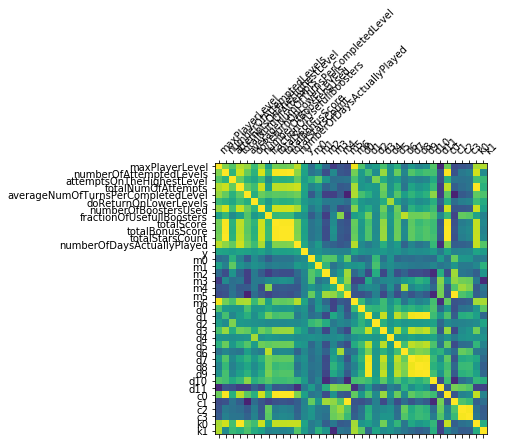

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(data.corr(), vmin=-1, vmax=1)
plt.yticks(range(data.shape[1]), data.columns)
plt.xticks(range(data.shape[1]), data.columns, rotation=45, ha="left" )
plt.show()

In [12]:
data = data.replace([np.inf, -np.inf], np.nan)

In [13]:
data = data.fillna(data.mean())

In [14]:
data.to_pickle('data.pik')